In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
path_1 = Path(r'D:\jio institute\q3\responsible_ai\coding-assign\Bondora_dataset\Bondora_dataset')

In [109]:
df = pd.read_csv('D:\\jio institute\\q3\\responsible_ai\\coding-assign\\Bondora_dataset\\Bondora_dataset\\Bondora_preprocessed.csv')

In [110]:
# drop the columns 'PreviousRepaymentsBeforeLoan', 'CreditScoreEsMicroL', 'County' as the missing values for these columns are very high

df.drop(['PreviousRepaymentsBeforeLoan', 'CreditScoreEsMicroL', 'County'], axis = 1, inplace = True)

In [111]:
req_df = df.dropna().reset_index(drop = True)

In [112]:
req_df["amount_difference"]=req_df["AppliedAmount"]-req_df["Amount"]

In [113]:
req_df["interest_duration_index"]=req_df["Interest"]*req_df["LoanDuration"]

In [52]:
#req_df=req_df[req_df["Gender"]=="Female"]

In [114]:
lap=req_df[:50000]

In [115]:
lag=req_df[50000:len(req_df)]

In [116]:
X=lap[['amount_difference', 'interest_duration_index','IncomeTotal','PrincipalPaymentsMade','PreviousEarlyRepaymentsCountBeforeLoan']]

In [117]:
lap["PrincipalPaymentsMade"].corr(lap["PrincipalBalance"])

-0.2715067739932127

Variation Inflation factor

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                  feature       VIF
0                       amount_difference  1.085916
1                 interest_duration_index  1.324648
2                             IncomeTotal  1.050448
3                   PrincipalPaymentsMade  1.229152
4  PreviousEarlyRepaymentsCountBeforeLoan  1.030936


Since VIF Is less than 5, there is no significant cross correlation between variables

In [119]:
y = lap['Default'].values
y = y.astype('int')

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7854
[[3431 2439]
 [ 780 8350]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.68      5870
           1       0.77      0.91      0.84      9130

    accuracy                           0.79     15000
   macro avg       0.79      0.75      0.76     15000
weighted avg       0.79      0.79      0.78     15000



In [121]:
pd=(np.sum(y_pred))/len(y_pred)
pd

0.7192666666666667

The probability of disadvantage class is 0.7192

# Shapley values

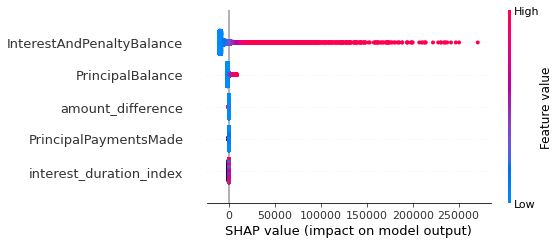

In [106]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)

##### from diffprivlib.models import LogisticRegression

model = LogisticRegression(epsilon=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Adding noise to the dataset

In [91]:
epsilon_AA = 0.6
sensitivity = 1

req_df['AppliedAmount'] = req_df['AppliedAmount'] + np.random.laplace(loc = 0, scale = sensitivity/epsilon_AA)

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7854
[[3431 2439]
 [ 780 8350]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.68      5870
           1       0.77      0.91      0.84      9130

    accuracy                           0.79     15000
   macro avg       0.79      0.75      0.76     15000
weighted avg       0.79      0.79      0.78     15000



In [110]:
from diffprivlib.models import LogisticRegression

model = LogisticRegression(epsilon=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.769
[[3923 1947]
 [1518 7612]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      5870
           1       0.80      0.83      0.81      9130

    accuracy                           0.77     15000
   macro avg       0.76      0.75      0.75     15000
weighted avg       0.77      0.77      0.77     15000



C:\Users\Mangaleswara\anaconda3\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


In [92]:
lag1=lag[lag["Gender"]=="Female"]
lag2=lag[lag["Gender"]=="Male"]
X_test1=lag2[['amount_difference', 'interest_duration_index','IncomeTotal','PrincipalPaymentsMade','PreviousEarlyRepaymentsCountBeforeLoan']]
X_test2=lag1[['amount_difference', 'interest_duration_index','IncomeTotal','PrincipalPaymentsMade','PreviousEarlyRepaymentsCountBeforeLoan']]
y2 = lag1['Default'].values
y_test2 = y2.astype('int')
y1 = lag2['Default'].values
y_test1 = y1.astype('int')

On male seperated other test data

In [104]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test1)

accuracy = model.score(X_test1, y_test1)
print('Accuracy:', accuracy)

print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))

Accuracy: 0.47284747363450336
[[   0 2455]
 [ 894 3004]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2455
           1       0.55      0.77      0.64      3898

    accuracy                           0.47      6353
   macro avg       0.28      0.39      0.32      6353
weighted avg       0.34      0.47      0.39      6353



On test data where only female gender is selected

In [106]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test2)

accuracy = model.score(X_test2, y_test2)
print('Accuracy:', accuracy)

print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred))

Accuracy: 0.4722787385554425
[[   0 1717]
 [ 358 1857]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1717
           1       0.52      0.84      0.64      2215

    accuracy                           0.47      3932
   macro avg       0.26      0.42      0.32      3932
weighted avg       0.29      0.47      0.36      3932



In [107]:
pa=(np.sum(y_pred))/len(y_pred)
pa

0.9089521871820956

The probability of advantage class is 0.90895

# ACF

In [94]:
X

,amount_difference,interest_duration_index,IncomeTotal,PrincipalPaymentsMade,PreviousEarlyRepaymentsCountBeforeLoan
0,0.0,2679.0,650.0,5500.00,0
1,0.0,1429.8,445.0,1200.00,0
2,0.0,4511.4,1117.0,1000.00,0
3,0.0,1305.6,1472.0,1000.00,0
4,0.0,2208.6,503.0,4100.00,0
...,...,...,...,...,...
49995,179.0,1740.0,451.0,219.92,0
49996,490.0,1920.0,675.0,3510.00,0
49997,699.0,1860.0,2187.0,2093.23,0
49998,0.0,648.0,1250.0,133.51,0


In [95]:
z = pd.get_dummies(req_df, columns = ['Country','Education','MaritalStatus','Gender'])

In [96]:
z.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'VerificationType', 'LanguageCode', 'Age',
       'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'City', 'UseOfLoan', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'LastPaymentOn', 'Rating', 'Restructured',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Default', 'year',
       'amount_difference', 'interest_duration_index', 'Country_EE',
       'Country_ES', 'Country_FI', 'Country_SK', '

In [97]:
z=z.iloc[:, -19:]

In [98]:
z=z[:50000]

In [99]:
from sklearn import datasets, linear_model, metrics
sal = pd.concat([z, X], axis=1)
sal = sal.dropna().reset_index(drop = True)
sal

,Country_EE,Country_ES,Country_FI,Country_SK,Education_Basic,Education_Higher,Education_Not_present,Education_Primary,Education_Secondary,Education_Vocational,...,MaritalStatus_Single,MaritalStatus_Widow,Gender_Female,Gender_Male,Gender_Unknown,amount_difference,interest_duration_index,IncomeTotal,PrincipalPaymentsMade,PreviousEarlyRepaymentsCountBeforeLoan
0,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0.0,2679.0,650.0,5500.00,0
1,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0.0,1429.8,445.0,1200.00,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.0,4511.4,1117.0,1000.00,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0.0,1305.6,1472.0,1000.00,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.0,2208.6,503.0,4100.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,179.0,1740.0,451.0,219.92,0
49996,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,490.0,1920.0,675.0,3510.00,0
49997,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,699.0,1860.0,2187.0,2093.23,0
49998,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.0,648.0,1250.0,133.51,0


In [100]:
from sklearn import linear_model
ind=X.columns
dep=z.columns
acf_residue=pd.DataFrame()
reg = linear_model.LinearRegression()
for i in ind:
    reg.fit(sal[dep],sal[i])
    ola=reg.predict(sal[dep])
    temp=ola-sal[i]
    acf_residue[i]=temp
acf_residue

,amount_difference,interest_duration_index,IncomeTotal,PrincipalPaymentsMade,PreviousEarlyRepaymentsCountBeforeLoan
0,366.750,-1892.5,298.0,-3996.00,0.160767
1,396.125,-475.3,497.0,190.00,0.172974
2,204.500,-3234.4,-461.0,329.00,0.182617
3,487.250,807.4,814.0,555.00,0.113770
4,261.750,-1089.6,341.0,-2471.00,0.165039
...,...,...,...,...,...
49995,-91.375,-398.0,543.0,555.08,0.004150
49996,-248.875,-541.0,645.0,-2109.00,0.166260
49997,-43.875,29.5,447.0,-343.23,0.116821
49998,75.500,715.5,-266.0,480.49,0.098755


In [101]:
acf_residue = pd.concat([acf_residue,lap['Default']], axis=1)
acf_residue

,amount_difference,interest_duration_index,IncomeTotal,PrincipalPaymentsMade,PreviousEarlyRepaymentsCountBeforeLoan,Default
0,366.750,-1892.5,298.0,-3996.00,0.160767,0
1,396.125,-475.3,497.0,190.00,0.172974,0
2,204.500,-3234.4,-461.0,329.00,0.182617,0
3,487.250,807.4,814.0,555.00,0.113770,0
4,261.750,-1089.6,341.0,-2471.00,0.165039,0
...,...,...,...,...,...,...
49995,-91.375,-398.0,543.0,555.08,0.004150,1
49996,-248.875,-541.0,645.0,-2109.00,0.166260,0
49997,-43.875,29.5,447.0,-343.23,0.116821,0
49998,75.500,715.5,-266.0,480.49,0.098755,1


In [103]:
X=acf_residue.drop(["Default"],axis=1)
y = acf_residue['Default'].values
y = y.astype('int')

# ACF Residuals model

In [93]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7854
[[3431 2439]
 [ 780 8350]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.68      5870
           1       0.77      0.91      0.84      9130

    accuracy                           0.79     15000
   macro avg       0.79      0.75      0.76     15000
weighted avg       0.79      0.79      0.78     15000



In [194]:
from diffprivlib.models import LogisticRegression

model = LogisticRegression(epsilon=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7493333333333333
[[3882 1988]
 [1772 7358]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      5870
           1       0.79      0.81      0.80      9130

    accuracy                           0.75     15000
   macro avg       0.74      0.73      0.74     15000
weighted avg       0.75      0.75      0.75     15000



C:\Users\Mangaleswara\anaconda3\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


On male test subjects

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test1)

accuracy = model.score(X_test1, y_test1)
print('Accuracy:', accuracy)

print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))

Accuracy: 0.8317330395088934
[[1591  864]
 [ 205 3693]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      2455
           1       0.81      0.95      0.87      3898

    accuracy                           0.83      6353
   macro avg       0.85      0.80      0.81      6353
weighted avg       0.84      0.83      0.83      6353



In [20]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [23]:
pa=(np.sum(y_pred))/len(y_pred)
pa

0.7172989138989454

The probability of advantage class is 0.7172

on female test subjects

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test2)

accuracy = model.score(X_test2, y_test2)
print('Accuracy:', accuracy)

print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred))

Accuracy: 0.8008646998982706
[[1070  647]
 [ 136 2079]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73      1717
           1       0.76      0.94      0.84      2215

    accuracy                           0.80      3932
   macro avg       0.82      0.78      0.79      3932
weighted avg       0.82      0.80      0.79      3932



In [25]:
pd=(np.sum(y_pred))/len(y_pred)
pd

0.6932858596134283

The probability of disadvantage class is 0.6932